In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import missingno as msno

In [2]:
# Load data
coin_data = pd.read_csv('./files/coins.csv')

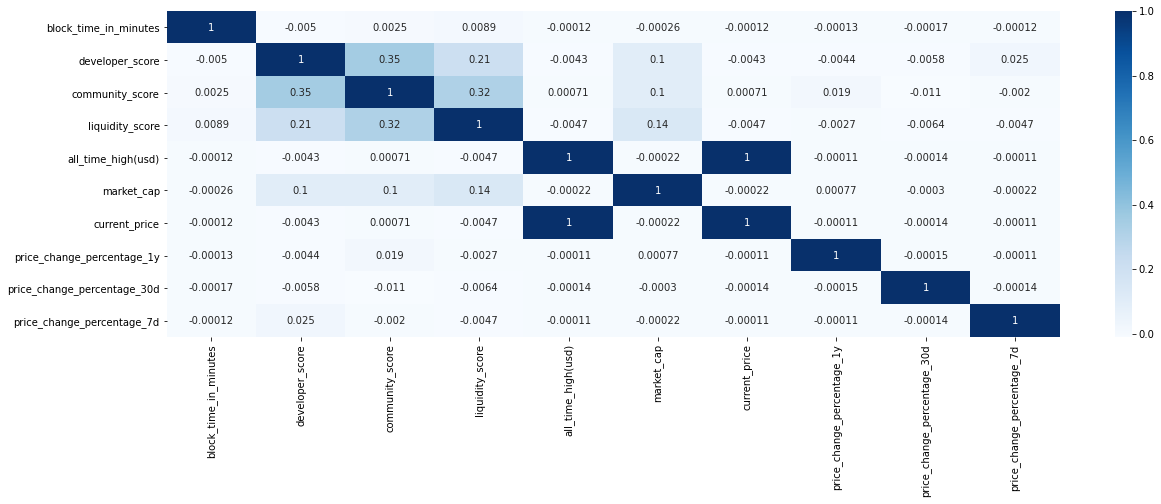

In [3]:
# Heatmap
plt.figure(figsize=(20,6))
coin_matrix = coin_data.corr()
sb.heatmap(coin_matrix, annot=True, cmap='Blues')
plt.savefig('stats/heatmap.png')

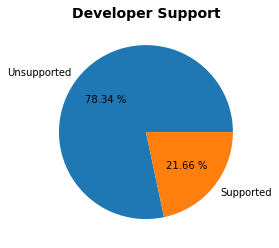

In [4]:
# Support by the coin developers
unsupported = coin_data.loc[coin_data.developer_score == 0.0].count()[0]
supported = coin_data.loc[coin_data.developer_score != 0.0].count()[0]

labels = ['Unsupported', 'Supported']
plt.title('Developer Support', fontdict={'fontsize': 14, 'fontweight': 'bold'})

plt.pie([unsupported, supported], labels = labels, autopct='%.2f %%')
plt.savefig('stats/developer_support.png')

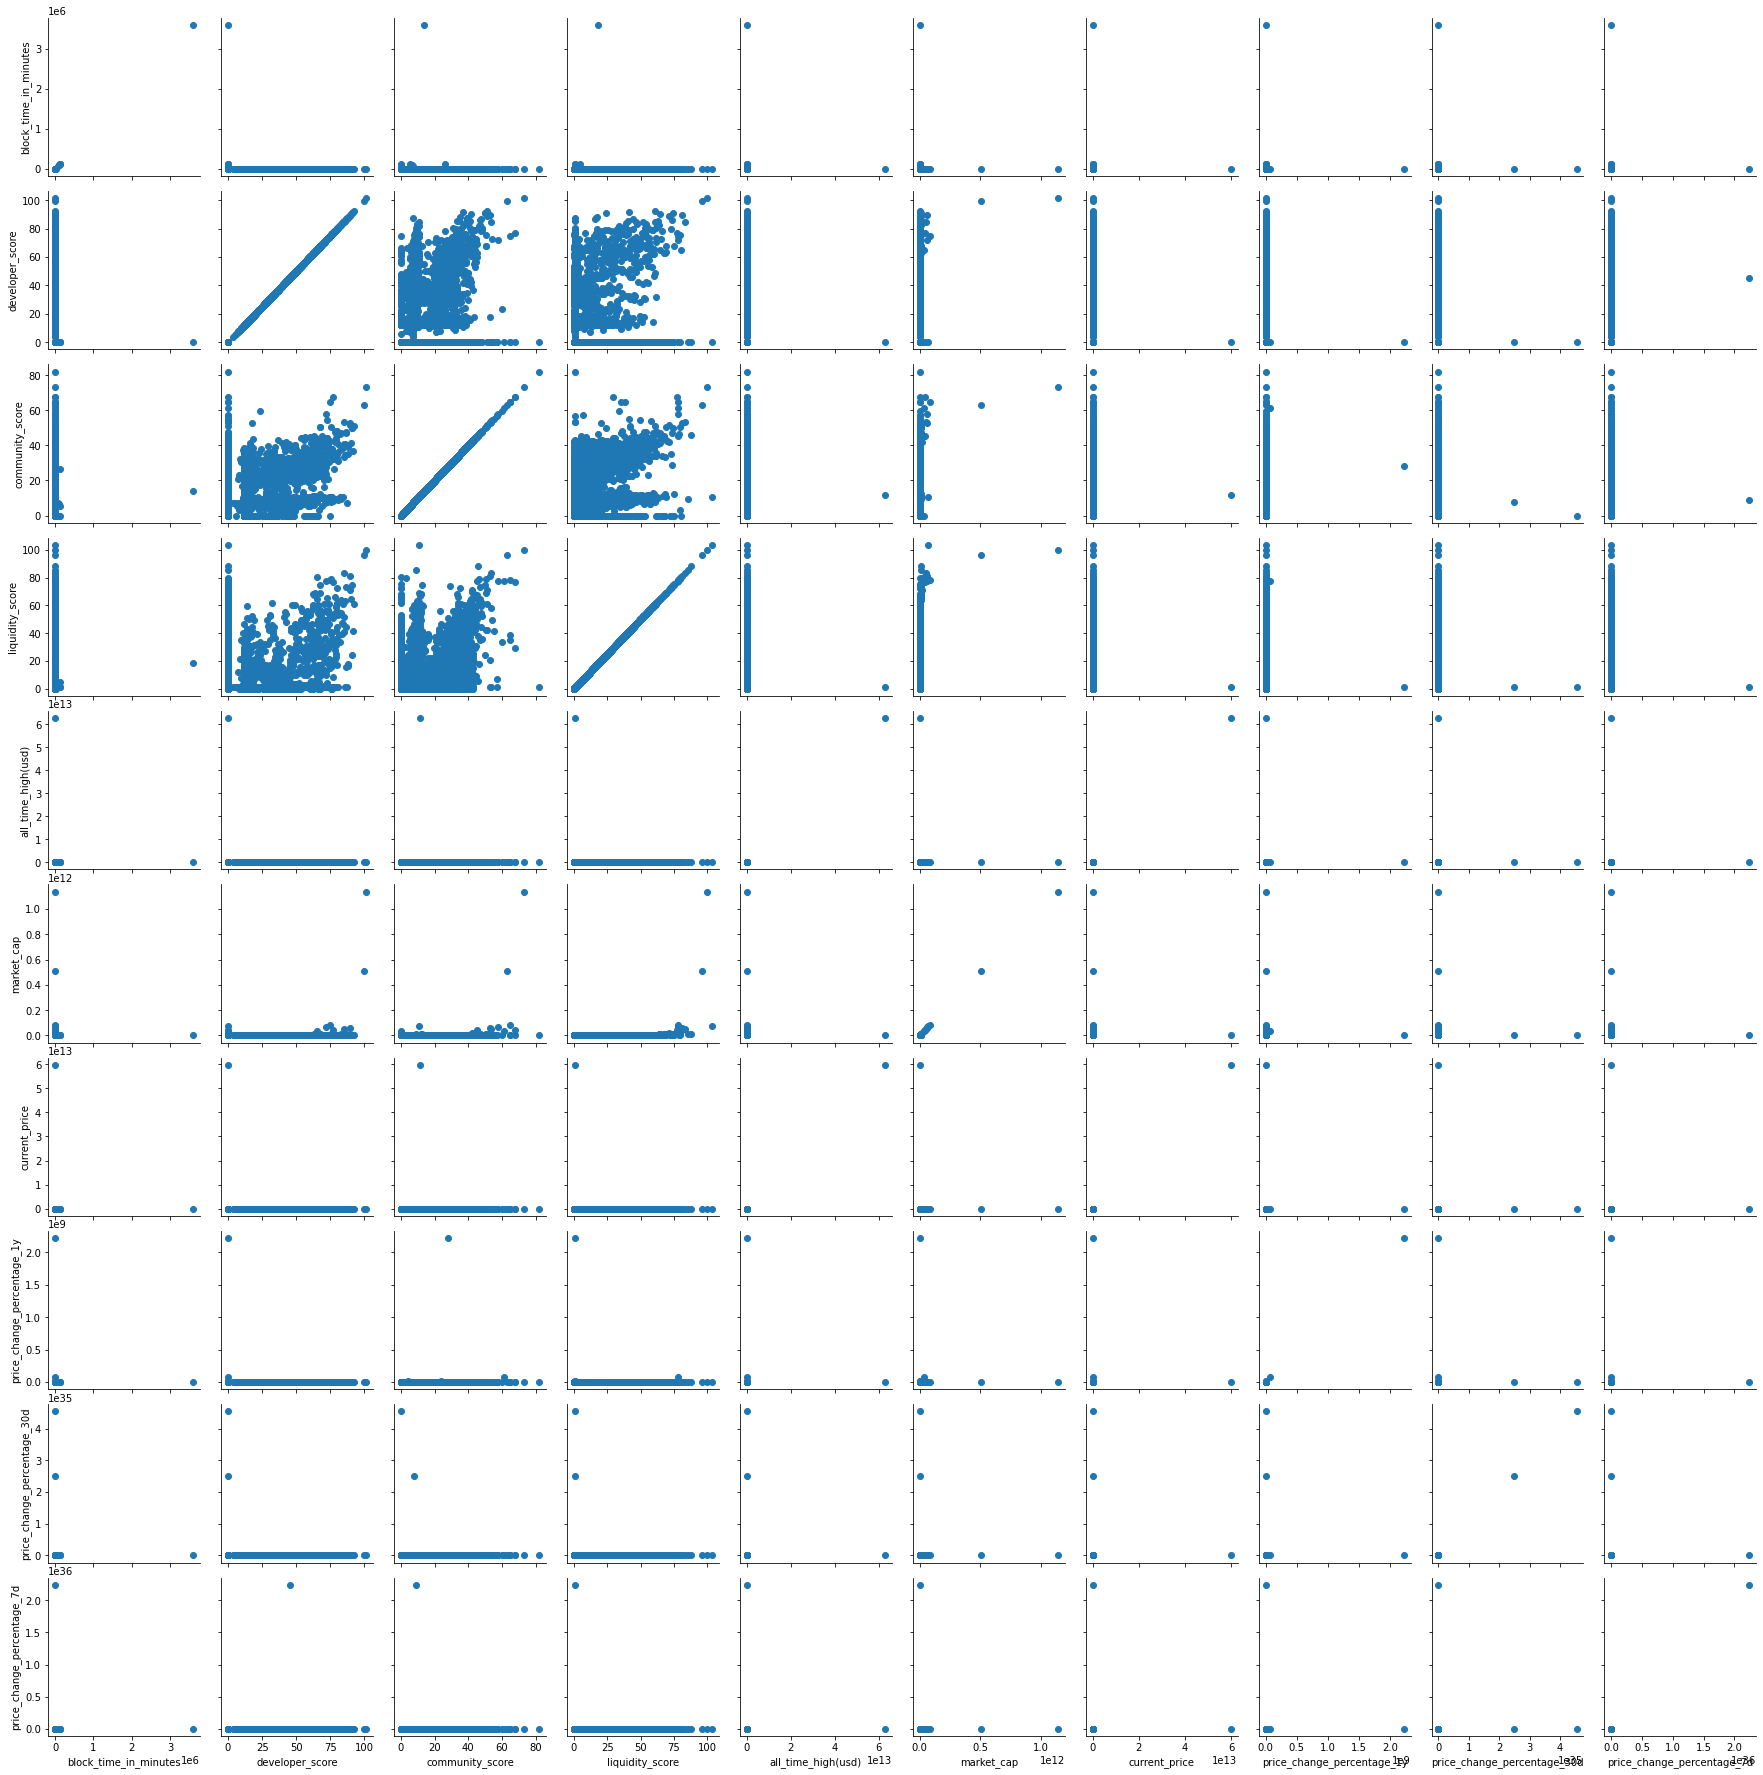

In [5]:
# Pair Grid
coins_g = sb.PairGrid(coin_data)
coins_g.map(plt.scatter)
plt.savefig('stats/pair_grid.png')

In [6]:
# Miscellaneous

# Number of algorithms used
print(f"There are {len(pd.unique(coin_data['hashing_algorithm']))} different algorithms.")
coin_data.describe()

There are 49 different algorithms.


,block_time_in_minutes,developer_score,community_score,liquidity_score,all_time_high(usd),market_cap,current_price,price_change_percentage_1y,price_change_percentage_30d,price_change_percentage_7d
count,9.575000e+03,9575.000000,9575.000000,9575.000000,9.472000e+03,9.472000e+03,9.468000e+03,9.574000e+03,9.574000e+03,9.574000e+03
mean,4.431838e+02,6.520668,10.704781,6.680543,6.620971e+09,2.813193e+08,6.305211e+09,2.421766e+05,7.346991e+31,2.343456e+32
std,3.688527e+04,15.698913,10.194014,12.404688,6.443329e+11,1.292464e+10,6.134769e+11,2.266095e+07,5.294109e+33,2.292997e+34
min,-2.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+02,-1.000000e+02,-1.000000e+02
25%,0.000000e+00,0.000000,5.374500,1.000000,1.874132e-02,0.000000e+00,4.876075e-04,0.000000e+00,-3.762818e+00,-1.095434e+01
50%,0.000000e+00,0.000000,8.045000,1.000000,4.056715e-01,0.000000e+00,2.295209e-02,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000,10.635000,6.194500,4.720000e+00,4.938710e+05,5.261855e-01,0.000000e+00,3.262985e+01,3.456510e+00
max,3.600000e+06,101.306000,82.085000,103.466000,6.270919e+13,1.137916e+12,5.969354e+13,2.215909e+09,4.541050e+35,2.243624e+36


In [7]:
# Statistics about categorical data except for scores
coin_data_no_categorical = coin_data[['block_time_in_minutes', 'developer_score', 'community_score', 'liquidity_score', 'all_time_high(usd)', 'market_cap', 'current_price', 'price_change_percentage_1y', 'price_change_percentage_30d', 'price_change_percentage_7d']]
no_categorical_no_scores = coin_data_no_categorical[['block_time_in_minutes', 'all_time_high(usd)', 'market_cap', 'current_price', 'price_change_percentage_1y', 'price_change_percentage_30d', 'price_change_percentage_7d']]
no_categorical_no_scores.describe()

,block_time_in_minutes,all_time_high(usd),market_cap,current_price,price_change_percentage_1y,price_change_percentage_30d,price_change_percentage_7d
count,9.575000e+03,9.472000e+03,9.472000e+03,9.468000e+03,9.574000e+03,9.574000e+03,9.574000e+03
mean,4.431838e+02,6.620971e+09,2.813193e+08,6.305211e+09,2.421766e+05,7.346991e+31,2.343456e+32
std,3.688527e+04,6.443329e+11,1.292464e+10,6.134769e+11,2.266095e+07,5.294109e+33,2.292997e+34
min,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+02,-1.000000e+02,-1.000000e+02
25%,0.000000e+00,1.874132e-02,0.000000e+00,4.876075e-04,0.000000e+00,-3.762818e+00,-1.095434e+01
50%,0.000000e+00,4.056715e-01,0.000000e+00,2.295209e-02,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,4.720000e+00,4.938710e+05,5.261855e-01,0.000000e+00,3.262985e+01,3.456510e+00
max,3.600000e+06,6.270919e+13,1.137916e+12,5.969354e+13,2.215909e+09,4.541050e+35,2.243624e+36


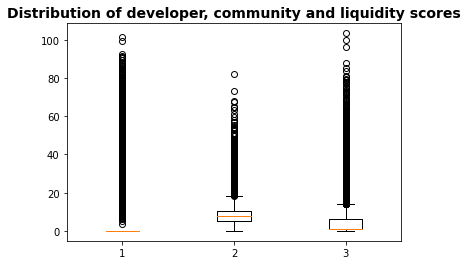

In [8]:
# Box plots (scores)
scores = coin_data_no_categorical[['developer_score', 'community_score', 'liquidity_score']]
plt.boxplot(scores)
plt.title('Distribution of developer, community and liquidity scores', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.savefig('stats/scores_box_plot.png')

The youngest coin was created in 2021-3-18 and the oldest was created in 2009-1-3.


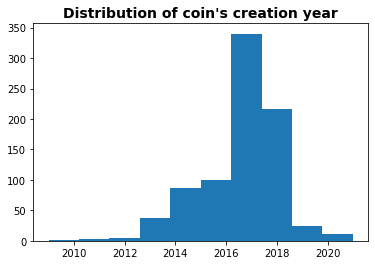

In [9]:
# Processing dates
timestamps = [pd.to_datetime(date, format='%Y-%m-%d', errors='coerce') for date in coin_data['genesis_date']]
# Removing invalid dates
filtered_timestamps = list(filter(lambda x: pd.isnull(x) == False, timestamps))
# Oldest and newest dates
newest = max(filtered_timestamps)
oldest = min(filtered_timestamps)

# Getting years
years = [date.year for date in filtered_timestamps]

plt.title('Distribution of coin\'s creation year', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.hist(years)
plt.savefig('stats/year_dist.png')

print(f"The youngest coin was created in {newest.year}-{newest.month}-{newest.day} and the oldest was created in {oldest.year}-{oldest.month}-{oldest.day}.")

# Analysing missing values

AttributeError: module 'missingno' has no attribute 'title'

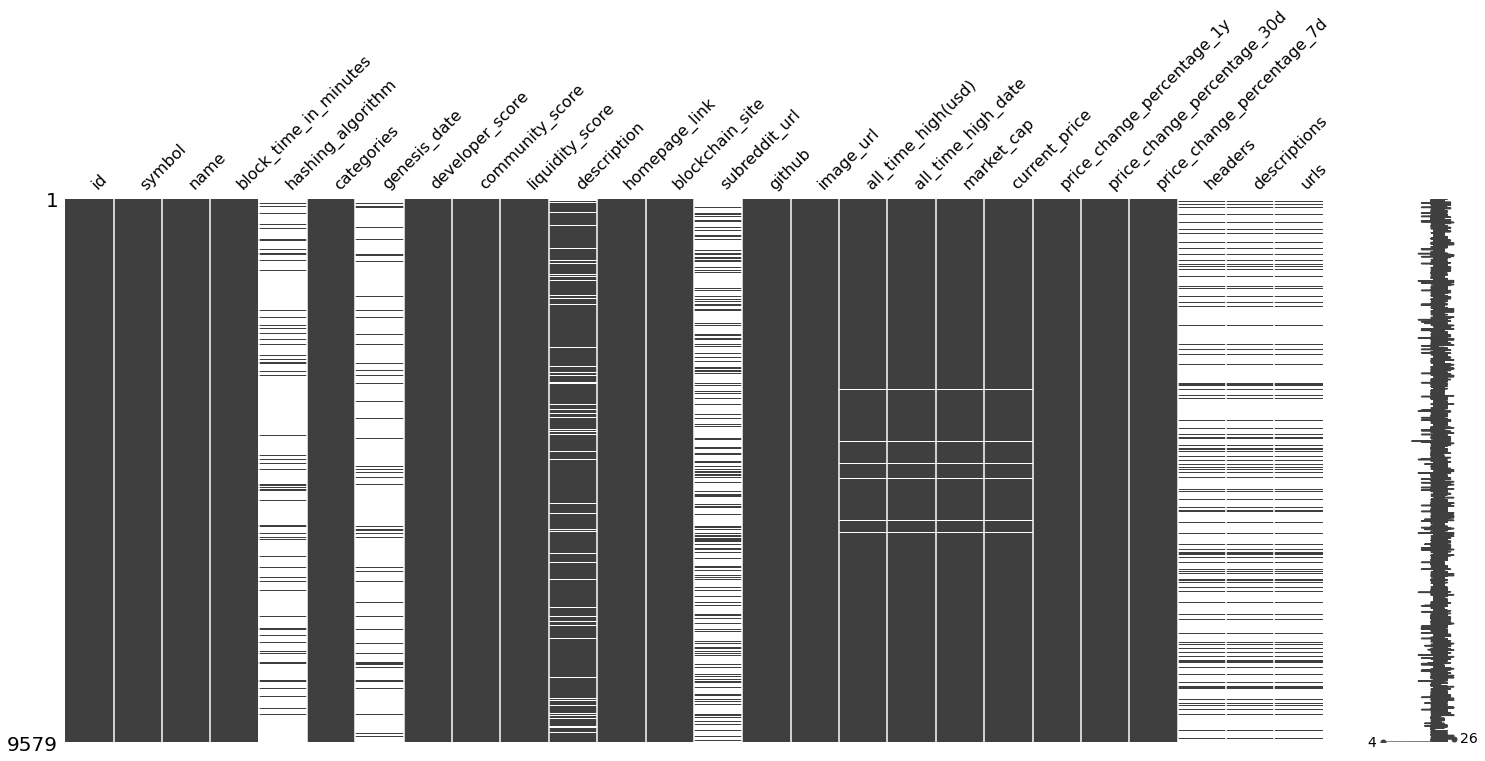

In [18]:
coin_news = pd.read_csv("files/coins_news.csv")

msno.matrix(coin_news)

<AxesSubplot:>

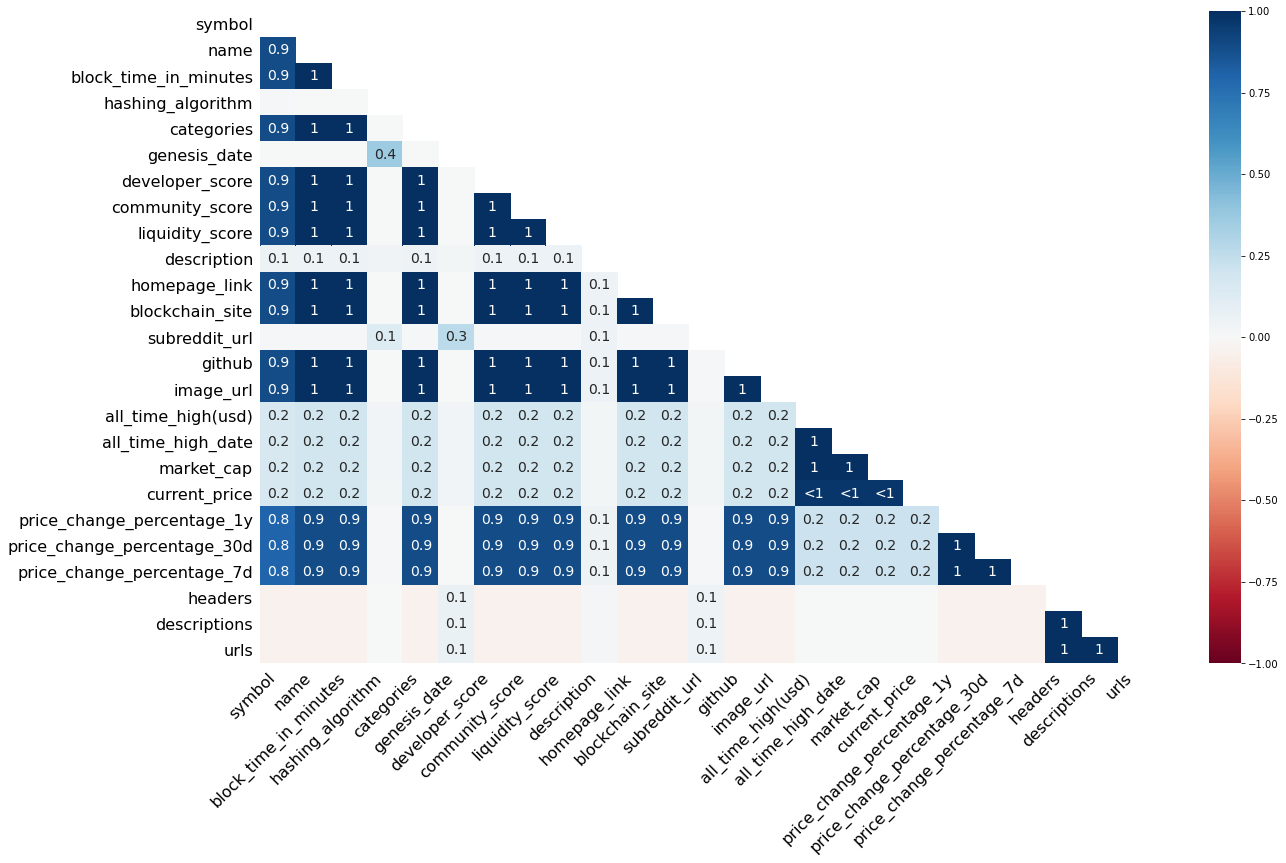

In [15]:
msno.heatmap(coin_news)

<AxesSubplot:>

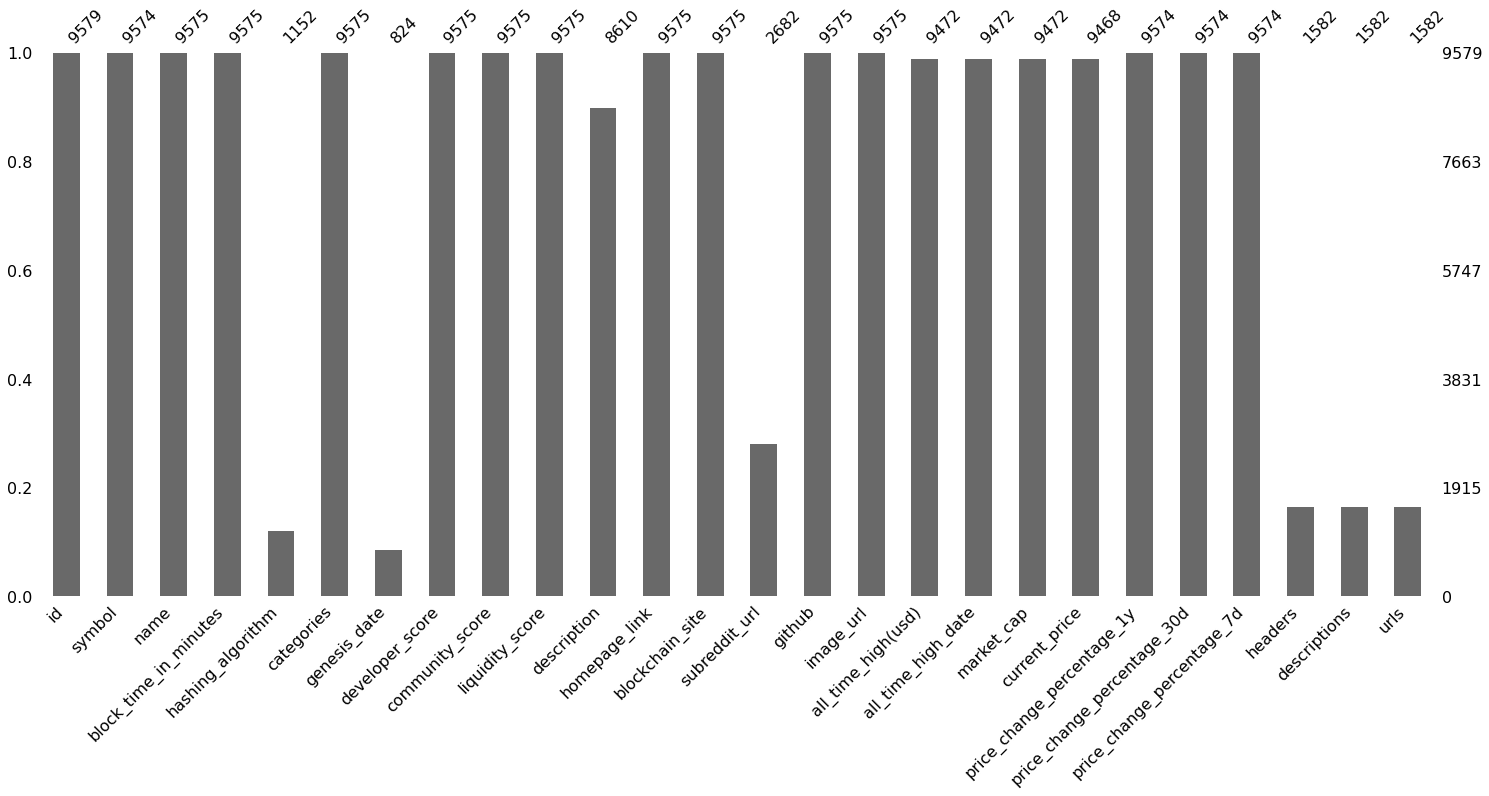

In [16]:
msno.bar(coin_news)